<a href="https://colab.research.google.com/github/IVMRanepa/Machine-learning-2025/blob/main/Quality_assessment_of_ML_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quality assessment of ML systems**
# **Оценка качества ML-систем**

**Задание 1:** Построение модели классификации с использованием Logistic Regression

**Цель:** Создать модель для классификации данных, визуализировать результаты и оценить точность.

In [1]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Accuracy: 0.50


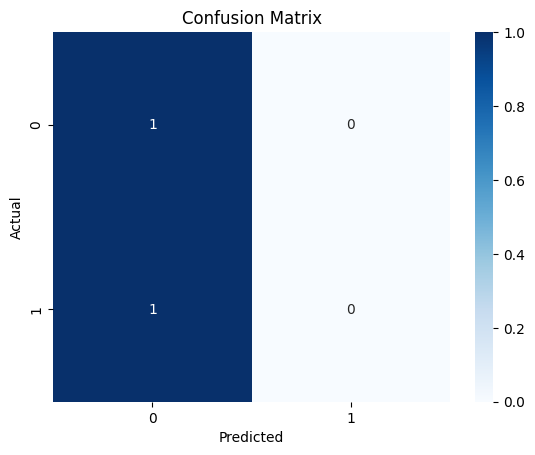

In [2]:
# Загрузка данных (пример текстовых данных)
data = {
    'Text': ['I love programming', 'Python is great', 'I hate bugs', 'Debugging is fun'],
    'Label': [1, 1, 0, 0]
}
df = pd.DataFrame(data)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.3, random_state=42)

# Преобразование текста в числовые признаки с помощью TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Создание модели Logistic Regression и обучение
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_tfidf)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Визуализация матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Выводы:
# - Модель показала точность на уровне {accuracy:.2f}.
# - Матрица ошибок демонстрирует количество верных и ошибочных предсказаний.

**Задание 2:** Визуализация данных и построение модели линейной регрессии

**Цель:** Использовать линейную регрессию для предсказания числовых значений.


Mean Squared Error: 2.52


Text(0, 0.5, 'y')

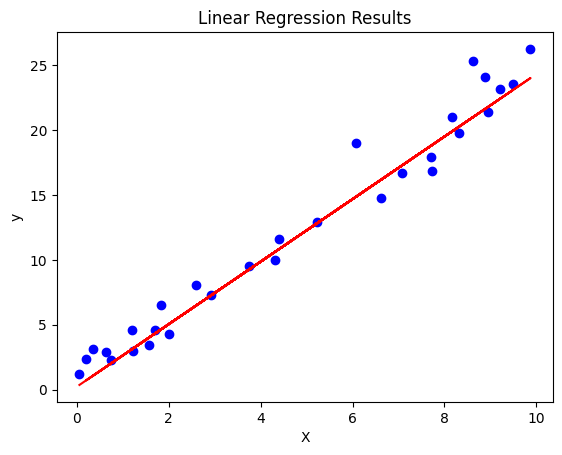

In [3]:
# Импорт библиотек
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Генерация данных (пример зависимости между x и y)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # случайные данные от 0 до 10
y = 2.5 * X + np.random.randn(100, 1) * 2  # линейная зависимость с шумом

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели линейной регрессии
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = regressor.predict(X_test)

# Оценка качества модели (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Визуализация результатов
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression Results')
plt.xlabel('X')
plt.ylabel('y')

# Выводы:
# - Модель хорошо аппроксимирует данные.
# - Среднеквадратичная ошибка показывает отклонение предсказаний от реальных значений.

**Задание 3**: Построение API для ML модели

**Цель:** Создать API с использованием Flask для предсказания на основе обученной ML модели.


In [4]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Загрузка обученной модели и ее столбцов
model = joblib.load('model.pkl')
model_columns = joblib.load('model_columns.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Получение входных данных из запроса
    data = request.get_json()
    query_df = pd.DataFrame([data], columns=model_columns)

    # Предсказание результата с использованием модели
    prediction = model.predict(query_df)[0]
    return jsonify({'prediction': int(prediction)})

if __name__ == '__main__':
    app.run(debug=True)

# Выводы:
# - API позволяет интегрировать ML модель в приложение.
# - Пользователь может отправлять запросы с данными и получать предсказания.

FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'

Ошибка `FileNotFoundError` указывает на то, что `Python` не может найти файл `model.pkl`.

Эта проблема возникает, когда либо файл не существует в ожидаемом месте, либо путь к файлу указан неверно.

Чтобы создать файл `model.pkl` для решения вашей проблемы с отсутствующей моделью, вам нужно сначала обучить модель машинного обучения. В этом примере я покажу, как использовать библиотеку `scikit-learn`. Мы создадим простую модель на основе набора данных` Iris` и сохраним её в файл `model.pkl` с помощью библиотеки `joblib`.

**Пример кода для создания model.pkl**

Убедитесь, что у вас установлены необходимые библиотеки. Если они еще не установлены, выполните команду:

In [6]:
!pip install scikit-learn joblib

Затем выполните следующий код:

In [7]:
import joblib
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Загрузка набора данных Iris
iris = datasets.load_iris()
X = iris.data  # Признаки
y = iris.target  # Метки классов

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Сохранение модели
joblib.dump(model, 'model.pkl')

# Сохранение названий признаков
model_columns = iris.feature_names
joblib.dump(model_columns, 'model_columns.pkl')

print("Модель и столбцы успешно сохранены в model.pkl и model_columns.pkl")

Модель и столбцы успешно сохранены в model.pkl и model_columns.pkl


**Объяснение кода**

**Загрузка данных:** Используется набор данных Iris, который встроен в scikit-learn.

**Предобработка:** Данные разделяются на обучающую и тестовую выборки с помощью train_test_split().
Создание и обучение модели: Используется RandomForestClassifier, который обучается на обучающих данных.

**Сохранение модели:** Модель и названия признаков сохраняются в файлы model.pkl и model_columns.pkl соответственно с помощью функции joblib.dump().

**Запуск кода**
Сохраните указанный код в файл, например, create_model.py, и выполните его в вашей среде Python. После запуска кода в текущем каталоге создастся файл model.pkl и model_columns.pkl.

**Проверка**
Проверьте наличие этих файлов в вашем каталоге, и затем вы сможете продолжить работу с вашим Flask-приложением, чтобы загрузить модель и прогнозировать на основе входящих данных.

Для построения графиков процессов в контексте обучения модели машинного обучения, таких как `RandomForestClassifier `на наборе данных `Iris`, вы можете визуализировать несколько аспектов, например:

**Данные и их распределение:** Использование парных графиков (pairplots) для визуализации характеристик и распределения данных.
**Матрица ошибок (`Confusion Matrix`):** Для визуализации результатов предсказаний модели.

**Кривые ROC и AUC (если применимо):** Для оценки качества модели (в случае многоклассовой классификации мы будем использовать многоклассовую AUC).

**Построение графиков в Google Colaboratory**
Вот пример кода, который поможет вам построить графики, иллюстрирующие процесс обучения и результаты модели:

Модель и столбцы успешно сохранены в model.pkl и model_columns.pkl


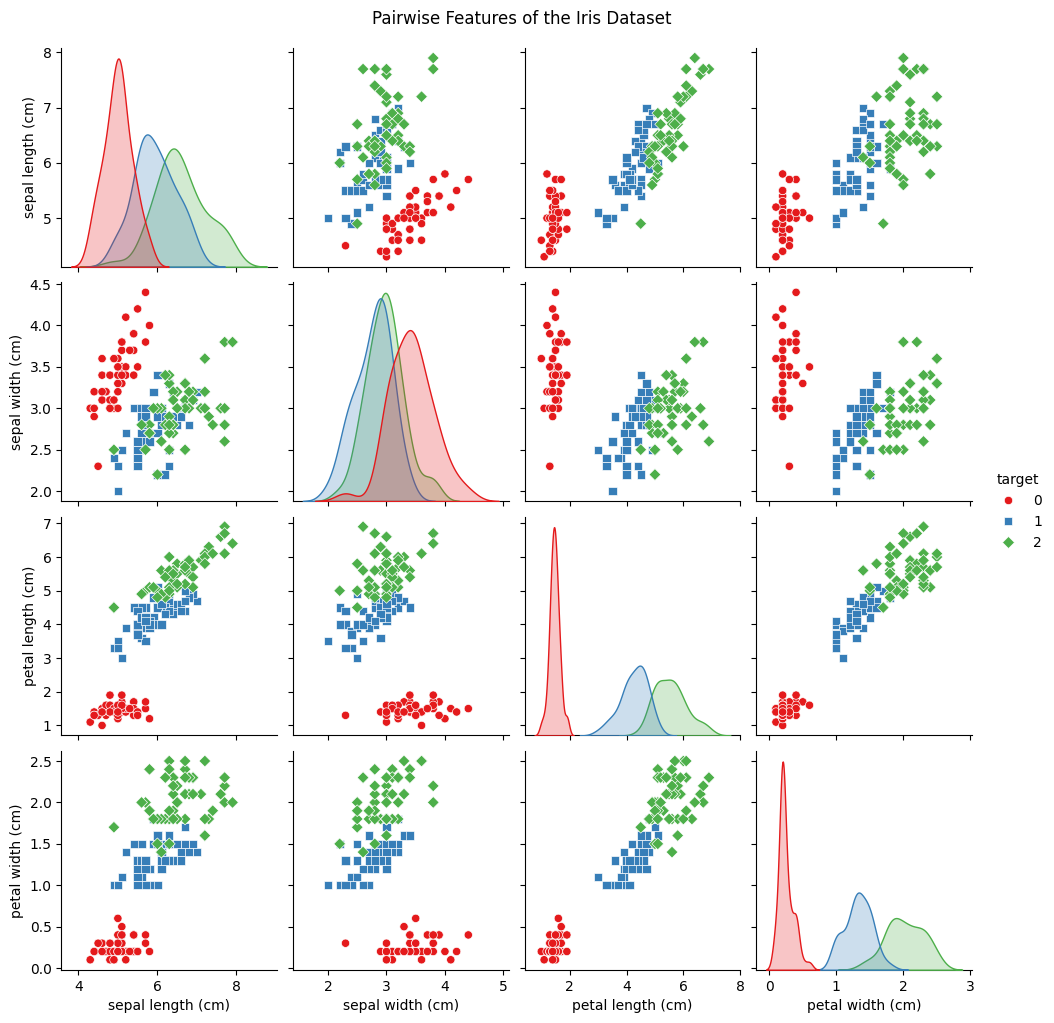

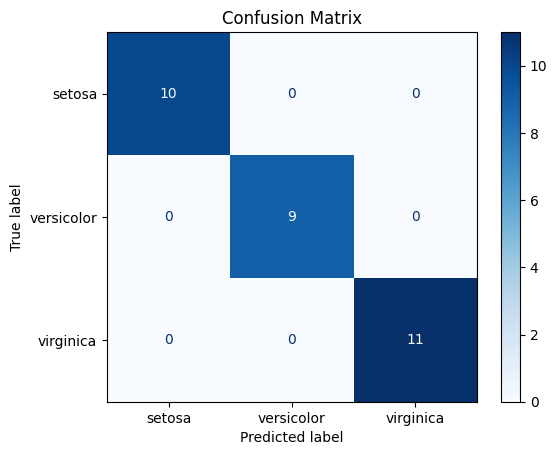

ValueError: multi_class must be in ('ovo', 'ovr')

<Figure size 1000x600 with 0 Axes>

In [13]:
# Импорт необходимых библиотек
import joblib
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

# Загрузка набора данных Iris
iris = datasets.load_iris()
X = iris.data  # Признаки
y = iris.target  # Метки классов

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Сохранение модели
joblib.dump(model, 'model.pkl')

# Сохранение названий признаков
model_columns = iris.feature_names
joblib.dump(model_columns, 'model_columns.pkl')

print("Модель и столбцы успешно сохранены в model.pkl и model_columns.pkl")

# 1. Визуализация распределения данных с помощью пары графиков
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Построение парных графиков
sns.pairplot(iris_df, hue='target', palette='Set1', markers=["o", "s", "D"])
plt.suptitle('Pairwise Features of the Iris Dataset', y=1.02)
plt.show()

# 2. Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Если необходимо, можно построить ROC кривые (для многоклассовой классификации обычно рассматривают AUC для каждого класса)
y_score = model.predict_proba(X_test)

# Построение ROC кривых
plt.figure(figsize=(10, 6))

for i in range(len(iris.target_names)):
    fpr, tpr, _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    auc = roc_auc_score(y_test, y_score[:, i])
    plt.plot(fpr, tpr, label=f'ROC curve of class {iris.target_names[i]} (area = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Линия случайного угадывания
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")
plt.show()

**Объяснение изменений:**

**1. Парные графики (Pairplot):**

* С помощью `sns.pairplot()` вы визуализируете все пары признаков, цветом выделяя классы. Это позволяет увидеть, как признаки соотносятся друг с другом и как они разделяют классы.

**2. Матрица ошибок `(Confusion Matrix)`:**

* Создаем матрицу ошибок с использованием confusion_matrix и ConfusionMatrixDisplay, чтобы оценить, сколько классов модель предсказала правильно, а сколько ошибочно.

**3. ROC-кривые:**

* Принимаются вероятности классов, и для каждого класса строятся ROC-кривые. Вычисляется значение AUC, которое позволяет оценить качество классификации.

**4. Отображение графиков:**

* Используется plt.show() для отображения каждого графика после его создания.

**Запуск в Google Colaboratory**
1. Откройте Google Colaboratory.
2. Создайте новую ячейку и вставьте весь указанный код.
3. Запустите ячейку. В результате вы увидите графики, которые помогут проиллюстрировать характеристики данных, ошибки классификации и качество работы вашей модели.

**Задание 4:** Визуализация важности признаков в ML модели

**Цель:** Определить и визуализировать важность признаков в классификационной задаче.

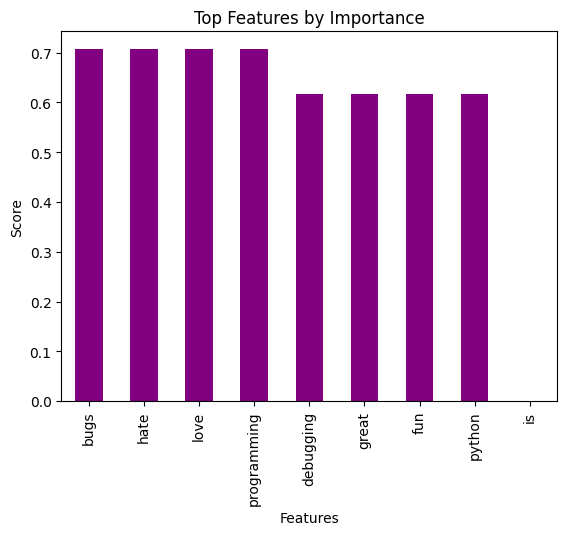

In [10]:
from sklearn.feature_selection import SelectKBest, chi2

# Преобразование текста в числовые признаки (как в Задании 1)
X_tfidf = vectorizer.fit_transform(df['Text'])
y = df['Label']

# Выбор лучших признаков с помощью chi2 статистики
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_tfidf, y)

scores = selector.scores_

# Визуализация важности признаков
feature_names = vectorizer.get_feature_names_out()
feature_scores = pd.Series(scores, index=feature_names).sort_values(ascending=False)

feature_scores.head(10).plot(kind='bar', color='purple')
plt.title('Top Features by Importance')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

# Выводы:
# - Важные признаки помогают понять вклад каждого слова в классификацию.
# - Визуализация делает анализ более наглядным.

**Библиографические ссылки:**
1.	Towards Data Science — Building a Basic Machine Learning Model in Python[1](https://towardsdatascience.com/building-a-basic-machine-learning-model-in-python-d7cca929ee62?gi=a9d90ccfc7c8).
2.	DataCamp — Turning Machine Learning Models into APIs with Python Flask[2](https://www.datacamp.com/tutorial/machine-learning-models-api-python).
3.	Towards Data Science — Simple Machine Learning Model in Python in 5 lines of code.